# SXSW 2017 Diversity Analysis


## Objective
**How diverse is SXSW really?**
## Methodology
* Data collecting - 
    * Used selenium and python to scrape all session and speaker pages from SXSW schedule. Collected the following about speakers - url, name, title, company, bio. Collected the following about sessions - title, speaker urls, description
* Data munging - 
    * Ran a word frequency analysis on bios and positions to determine which words to create inference algorithm around to classify speakers’ gender and position level.
    * Wrote inference algorithm around position level. Categorized about 600/3200 manually.
    * Used a combination of tenderizer python library (https://pypi.python.org/pypi/genderizer/0.1.2.3) and gender inference to figure out gender. Looked up and filled in 103 manually. resulted in 92% of speakers categorized into gender programmatically 
    * Text analytics on session description to determine topic of session (run word frequency, create boolean for most popular topics and categorize) 

## Data Exploration
What is the distribution of speaker position level, speaker gender, and session topic?

In [2]:
# Setting up file for analysis
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
%pylab inline

# Import session and speaker information
session_data = pd.read_csv("SXSW_2017_Sessions_Text_Mining.tsv",sep="\t",)
speaker_data = pd.read_csv("SXSW_2017_Speakers_Text_Mining.tsv", sep = "\t")

my_colors = [(0.46,0.34,0.89), (0.56, .64, .62)]

Populating the interactive namespace from numpy and matplotlib


### Join session and speaker information on speaker_url

In [3]:
sxsw_data_1 = pd.merge(speaker_data, session_data, left_on = 'link', right_on = 'speaker_1', left_index = False, right_index = False)
sxsw_data_2 = pd.merge(speaker_data, session_data, left_on = 'link', right_on = 'speaker_2', left_index = False, right_index = False)
sxsw_data_3 = pd.merge(speaker_data, session_data, left_on = 'link', right_on = 'speaker_3', left_index = False, right_index = False)
sxsw_data_4 = pd.merge(speaker_data, session_data, left_on = 'link', right_on = 'speaker_4', left_index = False, right_index = False)
sxsw_data_5 = pd.merge(speaker_data, session_data, left_on = 'link', right_on = 'speaker_5', left_index = False, right_index = False)
sxsw_data_6 = pd.merge(speaker_data, session_data, left_on = 'link', right_on = 'speaker_6', left_index = False, right_index = False)

sxsw_data = pd.concat([sxsw_data_1, sxsw_data_2, sxsw_data_3, sxsw_data_4, sxsw_data_5, sxsw_data_6], ignore_index = True)
header_names = ['link', 'name', 'position', 'company', 'bio', 'position_level',
       'gender', 'session_link', 'session_title', 'session_desc',
       'speaker_1', 'speaker_2', 'speaker_3', 'speaker_4', 'speaker_5',
       'speaker_6', 'mentor', 'music', 'tech_general', 'high_tech',
       'design', 'vr', 'ai', 'film', 'health', 'marketing', 'women',
       'fashion', 'business', 'food', 'sports', 'cannabis', 'social',
       'data', 'gaming', 'millennial']

### Plot distribution of gender

In [4]:
gender = speaker_data['gender'].value_counts()
print gender

female    1651
male      1593
Name: gender, dtype: int64


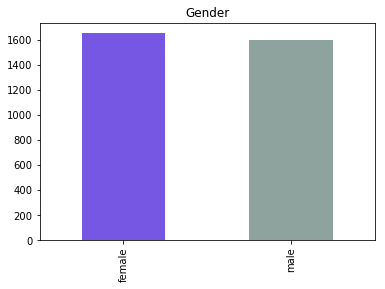

In [5]:
gender.plot(kind = 'bar', title = "Gender", color = my_colors)

### Plot distribution of position level

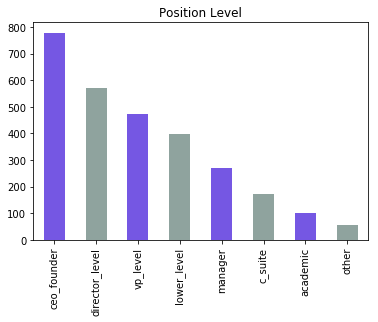

In [6]:
pos = speaker_data['position_level'].value_counts()
pos.plot(kind = 'bar', title = 'Position Level', color = my_colors)

### Plot distribution of topics

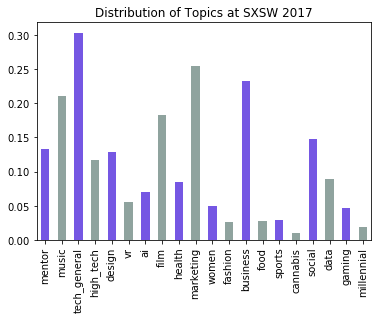

In [7]:
topic_series = session_data.mean()
topic_series = topic_series.drop('speaker_6')
topic_series.plot(kind = 'bar', title = 'Distribution of Topics at SXSW 2017', color = my_colors)

### Plot distribution of gender across topics

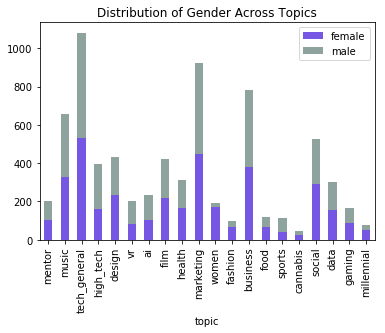

In [8]:
# Create dataframe of index = topic, female count, male count
topics_by_gender = DataFrame()
for h in header_names[16:]:
    # create a mask and select a sub dataframe for that topic being true
    topic = sxsw_data[sxsw_data[h] == True]
    topics_by_gender = topics_by_gender.append(topic['gender'].value_counts())

topics_by_gender['topic'] = pd.Series(header_names[16:], index = topics_by_gender.index)
topics_by_gender = topics_by_gender.set_index('topic')
topics_by_gender.plot(kind = 'bar', title = "Distribution of Gender Across Topics", stacked=True, color = my_colors)

In [9]:
# Expansion of the topics by gender dataframe to include percentiles
topics_by_gender['perc_female'] = topics_by_gender['female'] / (topics_by_gender['female'] + topics_by_gender['male'])*100
topics_by_gender['perc_male'] = topics_by_gender['male'] / (topics_by_gender['female'] + topics_by_gender['male'])*100
topics_by_gender['diff_perc_female_vs_male'] = topics_by_gender['perc_female'] - topics_by_gender['perc_male']
topics_by_gender

,female,male,perc_female,perc_male,diff_perc_female_vs_male
topic,,,,,
mentor,101.0,104.0,49.268293,50.731707,-1.463415
music,326.0,330.0,49.695122,50.304878,-0.609756
tech_general,532.0,549.0,49.213691,50.786309,-1.572618
high_tech,163.0,233.0,41.161616,58.838384,-17.676768
design,232.0,200.0,53.703704,46.296296,7.407407
vr,80.0,120.0,40.000000,60.000000,-20.000000
ai,103.0,131.0,44.017094,55.982906,-11.965812
film,219.0,201.0,52.142857,47.857143,4.285714
health,168.0,144.0,53.846154,46.153846,7.692308


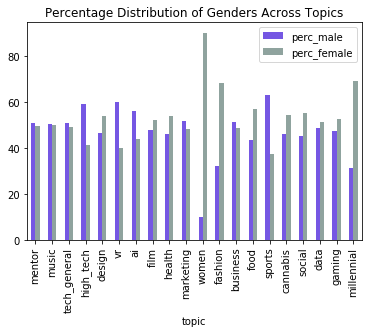

In [10]:
topics_by_gender.plot(kind='bar', y=['perc_male','perc_female'], 
                      title = "Percentage Distribution of Genders Across Topics", color = my_colors)

## Chi-Squared Test of Independence on the topics with high differences in percentages
The following topics are heavily dominated by women - 
* Women
* Fashion
* Millennials
* Food
* Health
* Cannabis

The following topics are heavily dominated by men - 
* General Tech (slightly, but significant for being top category)
* High Tech
* VR
* Sports

What's the chance that these differences are due to chance? Chi-squared tests for each topic below.

In [11]:
from scipy import stats as stat

# do chi squared for tech_general
observed = [topics_by_gender['male']['tech_general'], topics_by_gender['female']['tech_general']]
expected = [gender['male'] * topic_series['tech_general'], gender['female'] * topic_series['tech_general']]
print "Tech General: ", stat.chisquare(observed, expected)

# do chi squared for high tech
observed = [topics_by_gender['male']['high_tech'], topics_by_gender['female']['high_tech']]
expected = [gender['male'] * topic_series['high_tech'], gender['female'] * topic_series['high_tech']]
print "High Tech: ", stat.chisquare(observed, expected)

# do chi squared for VR
observed = [topics_by_gender['male']['vr'], topics_by_gender['female']['vr']]
expected = [gender['male'] * topic_series['vr'], gender['female'] * topic_series['vr']]
print "VR: ", stat.chisquare(observed, expected)

# do chi squared for sports
observed = [topics_by_gender['male']['sports'], topics_by_gender['female']['sports']]
expected = [gender['male'] * topic_series['sports'], gender['female'] * topic_series['sports']]
print "Sports: ", stat.chisquare(observed, expected)

# do chi squared for women
observed = [topics_by_gender['male']['women'], topics_by_gender['female']['women']]
expected = [gender['male'] * topic_series['women'], gender['female'] * topic_series['women']]
print "Women: ", stat.chisquare(observed, expected)

# do chi squared for Fashion
observed = [topics_by_gender['male']['fashion'], topics_by_gender['female']['fashion']]
expected = [gender['male'] * topic_series['fashion'], gender['female'] * topic_series['fashion']]
print "Fashion: ", stat.chisquare(observed, expected)

# do chi squared for Millennials
observed = [topics_by_gender['male']['millennial'], topics_by_gender['female']['millennial']]
expected = [gender['male'] * topic_series['millennial'], gender['female'] * topic_series['millennial']]
print "Millennial: ", stat.chisquare(observed, expected)

# do chi squared for Food
observed = [topics_by_gender['male']['food'], topics_by_gender['female']['food']]
expected = [gender['male'] * topic_series['food'], gender['female'] * topic_series['food']]
print "Food: ", stat.chisquare(observed, expected)

# do chi squared for Health
observed = [topics_by_gender['male']['health'], topics_by_gender['female']['health']]
expected = [gender['male'] * topic_series['health'], gender['female'] * topic_series['health']]
print "Health: ", stat.chisquare(observed, expected)

# do chi squared for Cannabis
observed = [topics_by_gender['male']['cannabis'], topics_by_gender['female']['cannabis']]
expected = [gender['male'] * topic_series['cannabis'], gender['female'] * topic_series['cannabis']]
print "Cannabis: ", stat.chisquare(observed, expected)

Tech General:  Power_divergenceResult(statistic=10.80722302885825, pvalue=0.001011048457025819)
High Tech:  Power_divergenceResult(statistic=16.223874361666731, pvalue=5.6280360063970599e-05)
VR:  Power_divergenceResult(statistic=12.709980026942523, pvalue=0.00036370931232956204)
Sports:  Power_divergenceResult(statistic=13.745109705159086, pvalue=0.00020936518308604327)
Women:  Power_divergenceResult(statistic=140.95401276709163, pvalue=1.6466378133007184e-32)
Fashion:  Power_divergenceResult(statistic=14.447607147387648, pvalue=0.00014411283171385787)
Millennial:  Power_divergenceResult(statistic=15.173635743380833, pvalue=9.8063048951523403e-05)
Food:  Power_divergenceResult(statistic=10.773267585358875, pvalue=0.0010297655386154582)
Health:  Power_divergenceResult(statistic=6.9443092140406524, pvalue=0.0084086302235187073)
Cannabis:  Power_divergenceResult(statistic=6.2663615670922521, pvalue=0.012305156994668756)


**What does this mean?**
The test statistic shows overall how close the observed and expected distributions were. The p-value shows the probability that the observed distribution was due to chance and the values are in fact independent. You can see all of the p-values are <.01 or 1%, meaning these distributions of male and female are likely not due to chance.

## Diving in further to "tech" sessions
What does the gender distribution look like for tech_general, high_tech, ai and vr?

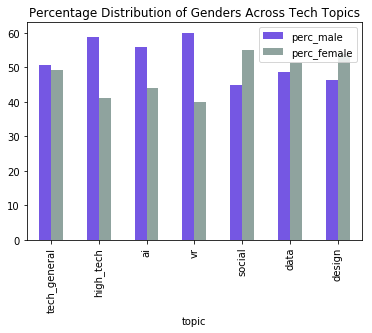

In [12]:
tech_data = topics_by_gender.ix[['tech_general', 'high_tech', 'ai','vr','social','data','design']]
tech_data.plot(kind = 'bar',y=['perc_male','perc_female'], title = "Percentage Distribution of Genders Across Tech Topics",
              color = my_colors)

In [13]:
print "Calculating Odds Ratio - A talk about 'topic' is X more likely to be male than females"
print tech_data['perc_male'] / tech_data['perc_female']

print "Calculating Odds Ratio - A talk about 'topic' is X more likely to be female than male"
print tech_data['perc_female'] / tech_data['perc_male']

Calculating Odds Ratio - A talk about 'topic' is X more likely to be male than females
topic
tech_general    1.031955
high_tech       1.429448
ai              1.271845
vr              1.500000
social          0.816609
data            0.948718
design          0.862069
dtype: float64
Calculating Odds Ratio - A talk about 'topic' is X more likely to be female than male
topic
tech_general    0.969035
high_tech       0.699571
ai              0.786260
vr              0.666667
social          1.224576
data            1.054054
design          1.160000
dtype: float64


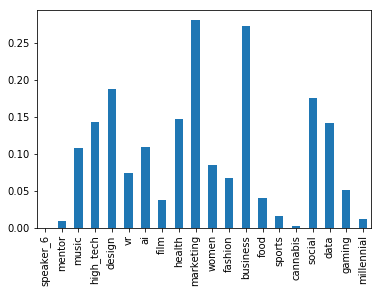

In [14]:
# Of all the topics that are labeled as tech general, and are given by females, what is the distribution of what
# the tech topic is actually about?

tech_general_split_female = sxsw_data[(sxsw_data['tech_general'] == True) & (sxsw_data['gender'] == 'female')].mean()
tech_general_split_female = tech_general_split_female.drop('tech_general')
tech_general_split_female.plot(kind = 'bar')

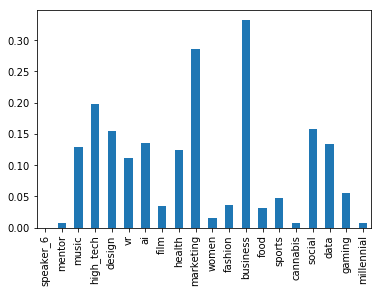

In [15]:
# Of all the topics that are labeled as tech general, and are given by males, what is the distribution of what
# the tech topic is actually about?

tech_general_split_male = sxsw_data[(sxsw_data['tech_general'] == True) & (sxsw_data['gender'] == 'male')].mean()
tech_general_split_male = tech_general_split_male.drop('tech_general')
tech_general_split_male.plot(kind = 'bar')

## When men speak on the topic of "women", what do they talk about?
Approximately 71% of sessions on the topic of women, are done by women. Is this fairly intuitive, or is this a signal of the continued imbalance of those who care about female empowerment contuining to be women? 

In [16]:
men_talk_women = sxsw_data[(sxsw_data['women'] == True) & (sxsw_data['gender'] == 'male')]
men_talk_women['session_title']

100                       Crave Build-A-Vibrator Workshop
112               How to Fundraise Without Silicon Valley
166     Harnessing Today’s Innovation Culture for Uncl...
202                           Diversity-Friendly Software
312     Safe Space to Rock: Combating Harassment in Music
601      Black Valley: Increasing Tech Internships & Jobs
826     Funding Our Future: Investing in Diverse Startups
875                   Empowering Women's Health with FHIR
1188    What To Do With Gender Norms & Entertainment M...
1317    Art + Science: Videos That Inform, Inspire & S...
1642    Funding Our Future: Investing in Diverse Startups
1902    Treat Your Film as a Startup: Ladies Who Hacke...
2303                           Elephant on Madison Avenue
2360    Harnessing Today’s Innovation Culture for Uncl...
2484    Badass Buying Power: The Rise of Millennial Women
2841           101 on Women's Health: More Than Fertility
2923    Safe Space to Rock: Combating Harassment in Music
3041          